## An example to preprocess the WV2 satellite image used in practical 2 (part 1) with GDAL

This Jupiter notebook contain code to 1) display metadata, 2) subset spatially (via .shp) and 3) spectrally (remove spectral bands) a 8 band Worldview-2 satellite image (Dunwich_20140701_WV2_raw.tif). I will include more code for band algebra (band ratios) and classification soon to replicate the image processing operations GEOM 2000/7000 students developed in Pract 2.  


In [6]:
## import os and gdal

from osgeo import gdal

import os

Using [os.getcwd()](https://docs.python.org/3/library/os.html#) to check the working directory I am currently in

In [11]:
## first to check the working directory

os.getcwd()


'D:\\RSC_repo'

In my case I am in D drive. In case I want to map where my image is I need to use [os.chdir()](https://docs.python.org/3/library/os.html#) in python as below:

In [20]:
os.chdir('D:\\RSC_repo\\Data')

Using the linux command "ls" to list waht I have in 'D:\\RSC_repo\\Data'

In [21]:
ls

 Volume in drive D is DATA
 Volume Serial Number is 6841-2554

 Directory of D:\RSC_repo\Data

13/04/2019  07:39 PM    <DIR>          .
13/04/2019  07:39 PM    <DIR>          ..
13/04/2019  07:13 PM        79,134,225 Dunwich_20140701_WV2_raw.tif
13/04/2019  07:39 PM                90 Dunwich_20140701_WV2_raw8.tfw
13/04/2019  07:40 PM       426,806,570 Dunwich_20140701_WV2_raw8.tif
13/04/2019  07:39 PM            79,081 Dunwich_20140701_WV2_raw8.tif.aux.xml
13/04/2019  07:40 PM        74,110,855 Dunwich_20140701_WV2_raw8.tif.ovr
               5 File(s)    580,130,821 bytes
               2 Dir(s)  1,510,482,673,664 bytes free


In [22]:
filename='Dunwich_20140701_WV2_raw8.tif'

Lets's check the metadata for the image as the first step to assess its quality so to be sure that your image has all the bands, geographic attributes like datum, projection, coordinates system, extent etc. For this we use the GDAL tool "gdal info". First let's import the python module [subprocess](https://docs.python.org/2/library/subprocess.html)

In [23]:
import subprocess
print (subprocess.check_output('gdalinfo '+'Dunwich_20140701_WV2_raw8.tif'+' -norat'+' -nomd',shell=True))

b'Driver: GTiff/GeoTIFF\r\nFiles: Dunwich_20140701_WV2_raw8.tif\r\n       Dunwich_20140701_WV2_raw8.tif.ovr\r\n       Dunwich_20140701_WV2_raw8.tif.aux.xml\r\nSize is 5577, 4723\r\nCoordinate System is:\r\nPROJCS["WGS_1984_UTM_Zone_56S",\r\n    GEOGCS["WGS 84",\r\n        DATUM["WGS_1984",\r\n            SPHEROID["WGS 84",6378137,298.257223563,\r\n                AUTHORITY["EPSG","7030"]],\r\n            AUTHORITY["EPSG","6326"]],\r\n        PRIMEM["Greenwich",0],\r\n        UNIT["degree",0.0174532925199433],\r\n        AUTHORITY["EPSG","4326"]],\r\n    PROJECTION["Transverse_Mercator"],\r\n    PARAMETER["latitude_of_origin",0],\r\n    PARAMETER["central_meridian",153],\r\n    PARAMETER["scale_factor",0.9996],\r\n    PARAMETER["false_easting",500000],\r\n    PARAMETER["false_northing",10000000],\r\n    UNIT["metre",1,\r\n        AUTHORITY["EPSG","9001"]],\r\n    AUTHORITY["EPSG","32756"]]\r\nOrigin = (535376.000000000000000,6964072.000000000000000)\r\nPixel Size = (2.000000000000000,-2

Next we will use the tool [gdal_translate](http://www.gdal.org/gdal_translate.html) within a function in Python to subset the image to 4 bands (RGBN) and change the format (from.img to tif). This will create a new image named "LandsatETM_20010822_4B.ti"​

In [10]:
def convertimg(infile):
    cmd= "gdal_translate -b 1 -b 2 -b 3 -b 4 %s LandsatETM_20010822_4B.tif" %(infile)
    os.system(cmd)

In [11]:
convertimg(filename)

Done the LandsatETM_20010822_4B.tif image was created, chack in your directory. Let's show it with the module mapplotlib in Python

In [14]:
image=gdal.Open('LandsatETM_20010822_4B.tif')

In [15]:
image_gdal =image.GetRasterBand(2).ReadAsArray()
print (image_gdal.shape)    

(6981, 7821)


In [16]:
import matplotlib.pyplot as plt

Next step to plot the image

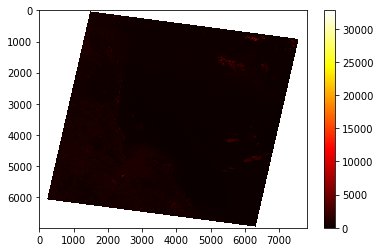

In [ ]:
plt.imshow(image_gdal, cmap = "hot", interpolation='nearest', aspect='auto')
plt.colorbar()
plt.show()

The next function will mask out areas of no interest and will crop the image to have only Heron Reef lagoon. In the next notebooks will go to more serious analyses in RS such as image algebra, clasification etc ..stay tunned!